## Modec Problem Demo

We are getting the sensor data in 2 dimentions. "Front to Reverse" and "Left to Right". For the demo purpose we only need to solve the problem for one dimention. The second dimention would be solved by repeating the same steps.

1. Let us first plot the sensor data.

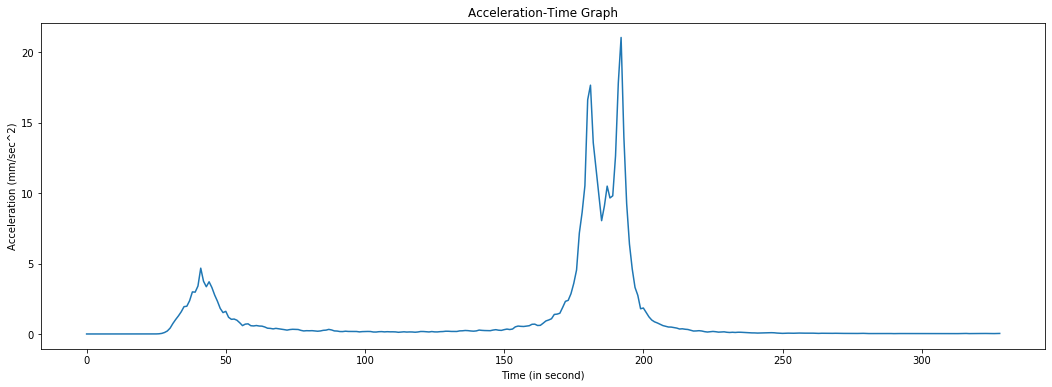

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq, ifft

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

accelerometerReading=[0.000075,0.000066,0.000069,0.000067,0.000072,0.000077,0.000089,0.000077,0.000087,0.000094,0.000104,0.000112,0.000123,0.000136,0.000158,0.000177,0.000199,0.000232,0.000282,0.000345,0.000413,0.000542,0.000816,0.001488,0.003688,0.013071,0.040865,0.105207,0.212276,0.416092,0.744791,1.028363,1.28647,1.577253,1.939403,1.9673,2.36121,2.984875,2.968135,3.40321,4.669731,3.740048,3.351166,3.702566,3.297685,2.763201,2.322197,1.813412,1.517358,1.606686,1.185035,1.039931,1.058911,0.976118,0.797183,0.592949,0.698949,0.719275,0.585431,0.569751,0.599422,0.563758,0.555477,0.49591,0.409266,0.396105,0.360335,0.398273,0.369427,0.335822,0.308504,0.274055,0.312914,0.332496,0.321285,0.31757,0.254541,0.215112,0.232816,0.228116,0.234584,0.21715,0.195188,0.215253,0.25833,0.273194,0.325267,0.285576,0.217001,0.20737,0.172692,0.170719,0.196906,0.179595,0.177829,0.171478,0.176256,0.147792,0.167202,0.172637,0.178603,0.174245,0.139767,0.137616,0.161608,0.167312,0.148364,0.161958,0.152551,0.15384,0.146514,0.119995,0.13747,0.153873,0.135751,0.145221,0.141273,0.124124,0.141302,0.175532,0.173985,0.155107,0.142999,0.1714,0.14797,0.144931,0.165191,0.172217,0.195346,0.192706,0.180284,0.182163,0.177977,0.218889,0.225616,0.247113,0.236975,0.212114,0.198496,0.217732,0.276616,0.25524,0.243848,0.241887,0.233758,0.277501,0.304819,0.267841,0.254757,0.307221,0.347244,0.315286,0.349604,0.504739,0.561136,0.54112,0.531232,0.557911,0.585212,0.687713,0.697317,0.601646,0.613288,0.763379,0.925171,0.993371,1.081011,1.38664,1.407797,1.47154,1.881199,2.315329,2.386885,2.858756,3.591836,4.540611,7.159954,8.626006,10.523218,16.620719,17.652373,13.569837,11.723031,9.905015,8.039445,9.076714,10.490857,9.651339,9.802259,12.632497,17.815059,21.038793,13.96097,9.242825,6.383717,4.612874,3.302949,2.744089,1.790106,1.841779,1.525541,1.215521,0.990982,0.861788,0.784405,0.693921,0.596339,0.545132,0.49413,0.488858,0.452216,0.417822,0.352615,0.367478,0.336159,0.31796,0.263331,0.20864,0.216129,0.233329,0.210499,0.16458,0.137606,0.160645,0.179695,0.160002,0.130053,0.140712,0.1528,0.121347,0.106521,0.121283,0.107699,0.123123,0.121353,0.108332,0.093488,0.075701,0.076998,0.075136,0.064313,0.071168,0.082974,0.085031,0.088757,0.091858,0.084449,0.064506,0.055876,0.043699,0.050963,0.057984,0.05582,0.05161,0.059834,0.064797,0.058705,0.057385,0.058271,0.051852,0.056452,0.045488,0.041669,0.050837,0.048249,0.039669,0.037599,0.045185,0.049119,0.0445,0.03647,0.040274,0.03869,0.033541,0.031781,0.039279,0.03656,0.040386,0.044446,0.03577,0.029791,0.030584,0.031018,0.028878,0.033474,0.037172,0.036262,0.034178,0.031135,0.025254,0.031056,0.030986,0.030599,0.029603,0.030478,0.030641,0.029423,0.027025,0.026817,0.029014]


accelerometerReading = [0.000023,0.000044,0.000044,0.000045,0.000048,0.000051,0.000049,0.000059,0.000059,0.000067,0.000071,0.000079,0.000083,0.0001,0.000109,0.000124,0.000144,0.000169,0.000199,0.000241,0.0003,0.00039,0.000554,0.000901,0.002395,0.005544,0.017793,0.060517,0.131799,0.355068,0.704743,0.819024,1.08115,1.299791,1.25685,1.336307,1.766193,1.881793,2.156905,2.390931,3.25891,4.326352,4.354701,3.815062,3.229609,3.238587,2.958111,2.551775,2.47286,1.96528,1.543044,1.335576,1.504947,1.299137,1.059406,1.104721,0.925951,0.741374,0.900824,0.766649,0.653318,0.67091,0.545176,0.603586,0.761832,0.656405,0.566536,0.474843,0.442967,0.452914,0.449577,0.45945,0.478166,0.513013,0.428749,0.325161,0.333265,0.362521,0.301601,0.246433,0.236726,0.257366,0.241518,0.267529,0.240872,0.231533,0.228011,0.236047,0.25998,0.263547,0.18955,0.186989,0.197785,0.202944,0.180411,0.15133,0.139892,0.133763,0.151835,0.125648,0.098384,0.112253,0.111978,0.112251,0.10965,0.09281,0.110011,0.104463,0.102905,0.104443,0.096363,0.088577,0.095998,0.091655,0.0904,0.082327,0.080727,0.084209,0.083506,0.076369,0.07226,0.076037,0.069084,0.088573,0.086268,0.076072,0.086967,0.079617,0.077275,0.07234,0.07476,0.076861,0.067793,0.067747,0.06713,0.062349,0.068324,0.082714,0.072053,0.061641,0.061404,0.069688,0.07154,0.071917,0.065846,0.053784,0.051689,0.051671,0.062059,0.062018,0.065169,0.061813,0.060068,0.06362,0.073613,0.074807,0.067643,0.058411,0.064549,0.062,0.056878,0.057804,0.063847,0.057459,0.06414,0.074348,0.074586,0.069604,0.063501,0.065318,0.068344,0.066658,0.073802,0.067156,0.091988,0.105829,0.116285,0.151245,0.156871,0.17353,0.24408,0.229977,0.199638,0.192196,0.149312,0.115922,0.120838,0.146471,0.15877,0.183968,0.218339,0.340458,0.466691,0.42072,0.350539,0.304709,0.307776,0.31074,0.330087,0.350652,0.474194,0.513825,0.612292,0.75496,1.222114,1.665806,2.279913,1.826045,0.928369,0.592057,0.439686,0.389822,0.387055,0.278411,0.245683,0.221914,0.171547,0.149269,0.141726,0.125674,0.139318,0.117196,0.10276,0.097621,0.101642,0.100354,0.103833,0.087334,0.079993,0.07979,0.060626,0.062727,0.069716,0.066026,0.065953,0.061406,0.055904,0.046962,0.043438,0.052809,0.042915,0.03889,0.039955,0.04473,0.036721,0.034368,0.038079,0.037083,0.029728,0.033672,0.036202,0.030907,0.03373,0.036207,0.027873,0.029888,0.030225,0.021762,0.022604,0.030797,0.03239,0.027374,0.023433,0.023092,0.02629,0.026293,0.021336,0.01744,0.021654,0.022281,0.023435,0.027287,0.024502,0.024662,0.019811,0.018144,0.019793,0.018719,0.021579,0.02522,0.021157,0.017905,0.018671,0.017584,0.015803,0.016785,0.021301,0.019519,0.017292,0.015356,0.014138,0.016622,0.017374,0.016335,0.018491,0.015027,0.012583,0.013435,0.013692,0.015154,0.01607,0.015684,0.01495,0.016285,0.017373,0.015894,0.016264,0.016564,0.016598,0.013669,0.010647,0.014241,0.014778,0.015137,0.014326,0.015806,0.016106,0.015368,0.015552,0.014854,0.015044,0.01767,0.016444,0.015833,0.015982,0.017693,0.017707,0.016432,0.017547]
accelerometerReading = [0.000031,0.000075,0.000066,0.000069,0.000067,0.000072,0.000077,0.000089,0.000077,0.000087,0.000094,0.000104,0.000112,0.000123,0.000136,0.000158,0.000177,0.000199,0.000232,0.000282,0.000345,0.000413,0.000542,0.000816,0.001488,0.003688,0.013071,0.040865,0.105207,0.212276,0.416092,0.744791,1.028363,1.28647,1.577253,1.939403,1.9673,2.36121,2.984875,2.968135,3.40321,4.669731,3.740048,3.351166,3.702566,3.297685,2.763201,2.322197,1.813412,1.517358,1.606686,1.185035,1.039931,1.058911,0.976118,0.797183,0.592949,0.698949,0.719275,0.585431,0.569751,0.599422,0.563758,0.555477,0.49591,0.409266,0.396105,0.360335,0.398273,0.369427,0.335822,0.308504,0.274055,0.312914,0.332496,0.321285,0.31757,0.254541,0.215112,0.232816,0.228116,0.234584,0.21715,0.195188,0.215253,0.25833,0.273194,0.325267,0.285576,0.217001,0.20737,0.172692,0.170719,0.196906,0.179595,0.177829,0.171478,0.176256,0.147792,0.167202,0.172637,0.178603,0.174245,0.139767,0.137616,0.161608,0.167312,0.148364,0.161958,0.152551,0.15384,0.146514,0.119995,0.13747,0.153873,0.135751,0.145221,0.141273,0.124124,0.141302,0.175532,0.173985,0.155107,0.142999,0.1714,0.14797,0.144931,0.165191,0.172217,0.195346,0.192706,0.180284,0.182163,0.177977,0.218889,0.225616,0.247113,0.236975,0.212114,0.198496,0.217732,0.276616,0.25524,0.243848,0.241887,0.233758,0.277501,0.304819,0.267841,0.254757,0.307221,0.347244,0.315286,0.349604,0.504739,0.561136,0.54112,0.531232,0.557911,0.585212,0.687713,0.697317,0.601646,0.613288,0.763379,0.925171,0.993371,1.081011,1.38664,1.407797,1.47154,1.881199,2.315329,2.386885,2.858756,3.591836,4.540611,7.159954,8.626006,10.523218,16.620719,17.652373,13.569837,11.723031,9.905015,8.039445,9.076714,10.490857,9.651339,9.802259,12.632497,17.815059,21.038793,13.96097,9.242825,6.383717,4.612874,3.302949,2.744089,1.790106,1.841779,1.525541,1.215521,0.990982,0.861788,0.784405,0.693921,0.596339,0.545132,0.49413,0.488858,0.452216,0.417822,0.352615,0.367478,0.336159,0.31796,0.263331,0.20864,0.216129,0.233329,0.210499,0.16458,0.137606,0.160645,0.179695,0.160002,0.130053,0.140712,0.1528,0.121347,0.106521,0.121283,0.107699,0.123123,0.121353,0.108332,0.093488,0.075701,0.076998,0.075136,0.064313,0.071168,0.082974,0.085031,0.088757,0.091858,0.084449,0.064506,0.055876,0.043699,0.050963,0.057984,0.05582,0.05161,0.059834,0.064797,0.058705,0.057385,0.058271,0.051852,0.056452,0.045488,0.041669,0.050837,0.048249,0.039669,0.037599,0.045185,0.049119,0.0445,0.03647,0.040274,0.03869,0.033541,0.031781,0.039279,0.03656,0.040386,0.044446,0.03577,0.029791,0.030584,0.031018,0.028878,0.033474,0.037172,0.036262,0.034178,0.031135,0.025254,0.031056,0.030986,0.030599,0.029603,0.030478,0.030641,0.029423,0.027025,0.026817,0.029014,0.027778,0.029347,0.031374,0.031744,0.030617,0.033074,0.031948,0.032048,0.029044,0.02903,0.030439,0.026247,0.025987,0.032409,0.040505,0.037949,0.026945,0.027104,0.030573,0.029773,0.033507,0.037282,0.035502,0.030483,0.029518,0.028104,0.032716,0.037793]

plt.plot(accelerometerReading);

# naming the x axis 
plt.xlabel('Time (in second)') 
# naming the y axis 
plt.ylabel('Acceleration (mm/sec^2)') 
  
# giving a title to my graph 
plt.title('Acceleration-Time Graph') 

# Increase the default size of the graph
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
  
# function to show the plot 
plt.show() 

2. Let us now apply the Fast Fourier Transform to it and plot the result again in frequency domain.

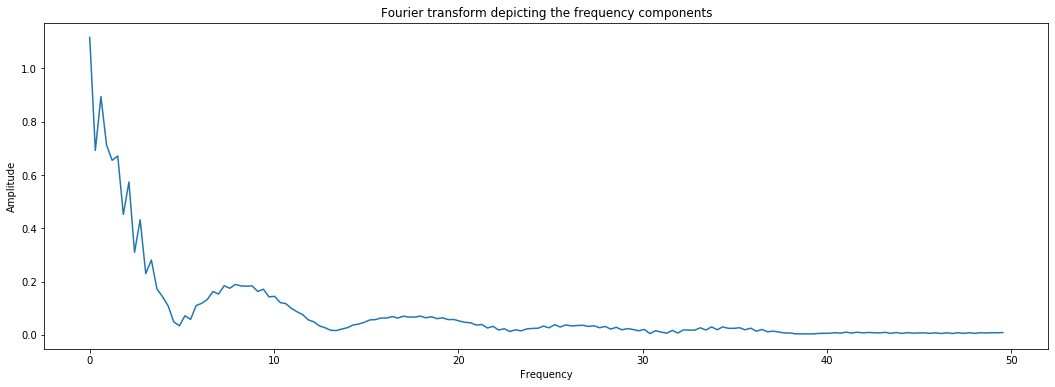

In [38]:
# Number of points
n = len(accelerometerReading)

# Time period in seconds
Lx = 4096

fourierTransform = np.fft.fft(accelerometerReading)/len(accelerometerReading) 
fourierTransform = fourierTransform[range(int(len(accelerometerReading)/2))]


tpCount     = len(accelerometerReading)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
plt.title('Fourier transform depicting the frequency components')
plt.plot(frequencies, abs(fourierTransform))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()

#print(frequencies);
#for i in frequencies:
#    print(i)


#for i in fourierTransform: 
#    print(abs(i))